# **Mid-Term Summative Assessment — Data Science Fundamentals**

- **Duration:** approx 1-3 hours per exercise (5-15 hours of work)
- **Format:** Individual coursework, submitted via Cortex and GitHub
- **Weight:** 30% of module grade
- **Dataset:** `attendance_anonymised.csv`

---

### 🎯 **Learning Outcomes**

By completing this assessment, you will demonstrate your ability to:

* Manage a Python data-science project using Git and GitHub.
* Import, clean, and transform a real-world dataset using `pandas`.
* Visualise data using `matplotlib`/`seaborn`.
* Build and run a simple interactive app with `pyShiny`.
* Perform and interpret a basic statistical analysis (correlation or regression).

### **💡 Tips**

* Always work from an **active virtual environment**.
* Keep your notebook clean and readable.
* Commit after each week’s exercise (recommended but not marked)
* Use `requirements.txt` to ensure reproducibility.

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf 


## 📘 Instructions

### **Exercise 1 — Project Setup (Version Control & Environment)**


1. Go to github.com and create a **new empty GitHub repository** on your Github account (no README, .gitignore, or license). 
   > *!Ensure the repo is public.*
2. Copy the repository URL and paste it below

   [[https://github.com/tobiade22/IDS_Summative_1.git]]



3. In your terminal, navigate to a local folder and run `git clone`:

   ```bash
   cd ./datascience2025/ 
   git clone <your_repo_url>
   ```
   > Tips: 
   > 1. Replace `./datascience2025/` with a local path of your choice
   > 2. replace <your_repo_url> with the url you copied from Github, e.g. https://github.com/user/repo-url. 
   
   This command will download the remote Github repo to the local path. It will create a folder on your machine (e.g. `./datascience2025/<assessment_project_repo>/`) linked to the remote folder on Github.
4. Inside this folder, create:

   * `requirements.txt` — include all packages needed for the project (you may copy the one used in class).
   * `README.md` — write exactly:

     ```
     Hello world! I love summative assessments.
     ```
5. Stage and commit both files:

   ```bash
   git add .
   git commit -m "Initial commit with requirements and readme. I really love summatives."
   git push
   ```
   > If you prefer using the VS Code user interface to push your commit, please feel free. 

✅ **Checkpoint:** Refresh your repository on GitHub. It should show both files.



### **Exercise 2 — Data Cleaning & Exploration**



1. Load `attendance_anonymised.csv` using `pandas`.



In [69]:
# your code here
df = pd.read_csv('attendance_anonymised-1.csv') # Load dataset 
df

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,2024-06-13,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,2024-06-13,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,2023-03-04,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,2025-06-24,Y,1,1,P


2. Describe the dataset using inbuilt functions such as `.head()`, `.info()`, `.describe()`.


In [70]:
# your code here
df.head()

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,Planned End Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,2023-11-01,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,2023-05-01,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,2023-05-07,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,2025-04-29,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,2025-03-22,N,0,0,A


3. Drop the `Planned End Date` column.


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17053 entries, 0 to 17052
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Person Code             17053 non-null  int64 
 1   Unit Instance Code      17053 non-null  int64 
 2   Calocc Code             17053 non-null  int64 
 3   Surname                 17053 non-null  object
 4   Forename                17053 non-null  object
 5   Long Description        17053 non-null  object
 6   Register Event ID       17053 non-null  int64 
 7   Object ID               17053 non-null  int64 
 8   Register Event Slot ID  17053 non-null  int64 
 9   Planned Start Date      17053 non-null  object
 10  Planned End Date        17053 non-null  object
 11  is Positive             17038 non-null  object
 12  Postive Marks           17053 non-null  int64 
 13  Negative Marks          17053 non-null  int64 
 14  Usage Code              17038 non-null  object
dtypes:

In [72]:
df.describe()

,Person Code,Unit Instance Code,Calocc Code,Register Event ID,Object ID,Register Event Slot ID,Postive Marks,Negative Marks
count,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000,17053.000000
mean,258.244473,1252.674016,2023.913212,495.752536,504.818742,572.408139,0.716531,0.732892
std,146.904888,530.609058,0.774686,292.031166,275.174454,313.946746,0.450695,0.442462
min,1.000000,4.000000,2023.000000,1.000000,7.000000,0.000000,0.000000,0.000000
25%,146.000000,840.000000,2023.000000,223.000000,267.000000,297.000000,0.000000,0.000000
50%,265.000000,1306.000000,2024.000000,515.000000,504.000000,574.000000,1.000000,1.000000
75%,384.000000,1749.000000,2025.000000,788.000000,733.000000,839.000000,1.000000,1.000000
max,498.000000,1945.000000,2025.000000,984.000000,984.000000,1124.000000,1.000000,1.000000


In [73]:
# your code here
df = df.drop("Planned End Date", axis=1) # Drops Planned End Date, axis=1 means it drops a column
df

,Person Code,Unit Instance Code,Calocc Code,Surname,Forename,Long Description,Register Event ID,Object ID,Register Event Slot ID,Planned Start Date,is Positive,Postive Marks,Negative Marks,Usage Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17048,28,1867,2025,Ben-Khalil,Kojo,Project Management,788,974,544,2025-05-25,N,0,0,A
17049,375,1867,2025,Becker,Tariq,Project Management,788,860,544,2025-05-25,Y,1,1,P
17050,407,1867,2025,Kumar,Thomas,Project Management,788,15,432,2025-02-16,N,0,0,A
17051,18,1867,2023,Durand,Charles,Project Management,788,376,693,2023-10-01,Y,1,1,P


4. Rename the columns exactly as follows:

   | Old                    | New             |
   | ---------------------- | --------------- |
   | Person Code            | Person Code     |
   | Unit Instance Code     | Module Code     |
   | Calocc Code            | Year            |
   | Surname                | Surname         |
   | Forename               | Forename        |
   | Long Description       | Module Name     |
   | Register Event ID      | Event ID        |
   | Object ID              | Object ID       |
   | Register Event Slot ID | Event Slot ID   |
   | Planned Start Date     | Date            |
   | is Positive            | Has Attended    |
   | Postive Marks          | Attended        |
   | Negative Marks         | NotAttended     |
   | Usage Code             | Attendance Code |



In [74]:
# your code here
df = df.rename(columns={'Person Code': 'Person Code', 'Unit Instance Code': 'Module Code', 'Calocc Code': 'Year', 
                   'Surname': 'Surname', 'Forename': 'Forename', 'Long Description': 'Module Name', 'Register Event ID': 'Event ID',
                   'Object ID': 'Object ID', 'Register Event Slot ID': 'Event Slot ID', 'Planned Start Date': 'Date', 
                   'is Positive': 'Has Attended', 'Postive Marks': 'Attended', 'Negative Marks': 'NotAttended',
                   'Usage Code': 'Attendance Code'}) # Rename method to change column names
df.head() # Check to see if column names have changed

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A


5. Convert `Date` to a pandas timestamp. 
   > tip: use `pd.to_datetime()`

In [75]:
# your code here
df['Date'] = pd.to_datetime(df['Date']) # Datetime method on 'Date' column
df.dtypes # Check to make sure that the data type is correct

Person Code                 int64
Module Code                 int64
Year                        int64
Surname                    object
Forename                   object
Module Name                object
Event ID                    int64
Object ID                   int64
Event Slot ID               int64
Date               datetime64[ns]
Has Attended               object
Attended                    int64
NotAttended                 int64
Attendance Code            object
dtype: object

6. Filter the DataFrame on **one specific module** (your choice) and plot its **attendance rate over time**
   (x = Date, y = the module's average attendance).



In [76]:
df['Module Name'].value_counts() # Check to see what modules are available
df['Module Name'].unique().tolist() # Using this for shiny app

['Nursing',
 'Italian',
 'History',
 'Arabic',
 'Database Design',
 'Spanish',
 'Journalism',
 'International Business',
 'Project Management',
 'Algorithms',
 'System Administration',
 'Public Speaking',
 'Cloud Computing',
 'English Literature',
 'Cybersecurity',
 'Discrete Mathematics',
 'Linguistics',
 'French',
 'Music Theory',
 'Religious Studies',
 'Marketing',
 'User Experience Design',
 'Theater',
 'Biology',
 'Statistics',
 'Nutrition',
 'Chemistry',
 'Linear Algebra',
 'Leadership',
 'Biomedical Engineering',
 'Digital Systems',
 'Political Science',
 'Arts & Crafts',
 'Occupational Therapy',
 'Quality Assurance',
 'Ethics',
 'Creative Writing',
 'Information Technology',
 'Graphic Design',
 'Data Science',
 'Web Development',
 'Japanese',
 'Data Analysis',
 'Epidemiology',
 'Geography',
 'Medicine',
 'Strategic Planning',
 'Pharmacy',
 'Business Intelligence',
 'Demographics']

In [77]:
# your code here
df['Module Name'].value_counts() # Check to see what modules are available

df_Theater = df[df['Module Name'] == 'Theater'].copy() # Filters and copies data frame so we have a new one to work with which avoids an error that cropped up.
df_Theater




,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code
465,25,1116,2023,Diaz,Nancy,Theater,596,280,707,2023-03-26,N,0,0,A
475,291,1116,2024,Ibrahim,Valeria,Theater,15,757,148,2024-04-23,Y,1,1,P
485,346,1116,2024,Reddy,Hana,Theater,596,880,418,2024-05-27,N,0,0,A
486,346,1116,2025,Reddy,Hana,Theater,596,880,143,2025-03-08,N,0,0,A
487,415,1116,2024,Mthembu,Mark,Theater,596,599,418,2024-05-27,~,0,1,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15811,215,1116,2023,Harris,Matthew,Theater,15,411,906,2023-10-01,N,0,0,A
15812,171,1116,2023,Al-Zahra,Donna,Theater,15,639,906,2023-10-01,N,0,0,A
15813,291,1116,2023,Ibrahim,Valeria,Theater,15,757,599,2023-05-27,N,0,0,A
15814,387,1116,2023,Zhang,Diego,Theater,15,158,599,2023-05-27,N,0,0,A


In [78]:
average_attendence = (df_Theater['Attended']).groupby(df_Theater['Date']).mean() # Groupby method groups the dataframe by date. Then the mean is calculated for each of the dates.
average_attendence # Displays series to check if values seem reasonable.


Date
2023-01-05    0.714286
2023-02-17    0.666667
2023-03-26    0.571429
2023-04-22    0.666667
2023-05-27    0.380952
2023-08-30    0.380952
2023-09-30    0.619048
2023-10-01    0.142857
2023-10-31    0.666667
2023-12-25    0.571429
2023-12-28    0.619048
2024-04-23    0.523810
2024-05-05    0.380952
2024-05-27    0.666667
2024-06-11    0.714286
2024-06-27    0.333333
2024-12-04    0.285714
2025-02-16    0.619048
2025-03-08    0.476190
2025-05-25    0.428571
Name: Attended, dtype: float64

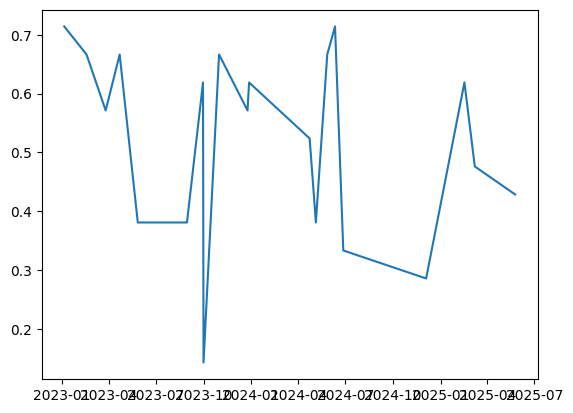

In [79]:
plt.plot(average_attendence) # Plots the series
plt.show()

7. **[For L6 students only]** Add a column, titled "Student Overall Attendance", with the average attendance for the student. Add a column, titled "Standardised Student Overall Attendance", with the z-scores of "Student Overall Attendance".

In [80]:
average_attendence_by_person = (df['Attended']).groupby(df['Person Code']).mean() # Groupby method groups dataframe by 'Person Code' then finds the mean
average_attendence_by_person # Check to see means

Person Code
1      0.649254
2      0.694030
3      0.928571
7      0.361702
10     0.952381
         ...   
482    0.894737
490    0.597315
491    0.964912
496    0.848276
498    0.862434
Name: Attended, Length: 174, dtype: float64

In [81]:
average_attendence_by_person = average_attendence_by_person.rename('Student Overall Attendance') # Rename series in preparation for merge

In [82]:
df = pd.merge(df, average_attendence_by_person, on='Person Code', how='left') # Merge series into main data frame. Uses Person Code as a key for 
                                                                              # merging and makes sure to preserve original dataframe columns
df.head()

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,Student Overall Attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,0.875000
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,0.875000
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,0.216216
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,0.216216
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,0.216216


In [83]:
mean_avg_att_by_person = average_attendence_by_person.mean() # Calculates mean
mean_avg_att_by_person

np.float64(0.7665484494125825)

In [84]:
std_avg_att_by_person = average_attendence_by_person.std() # Calculates standard deviation
std_avg_att_by_person

np.float64(0.21553949240096215)

Z score formula found here: https://www.investopedia.com/terms/z/zscore.asp

In [85]:
standardised_average_attendence_by_person = (average_attendence_by_person - mean_avg_att_by_person) / std_avg_att_by_person # Calculation of z score 
standardised_average_attendence_by_person

Person Code
1     -0.544191
2     -0.336452
3      0.751709
7     -1.878293
10     0.862174
         ...   
482    0.594733
490   -0.785160
491    0.920313
496    0.379176
498    0.444862
Name: Student Overall Attendance, Length: 174, dtype: float64

In [86]:
standardised_average_attendence_by_person = standardised_average_attendence_by_person.rename('Standardised Student Overall Attendance') # Rename series in preparation for joining
standardised_average_attendence_by_person # Check to see if series is renamed

Person Code
1     -0.544191
2     -0.336452
3      0.751709
7     -1.878293
10     0.862174
         ...   
482    0.594733
490   -0.785160
491    0.920313
496    0.379176
498    0.444862
Name: Standardised Student Overall Attendance, Length: 174, dtype: float64

In [87]:
df = pd.merge(df, standardised_average_attendence_by_person, on='Person Code', how='left') # Merges series into original dataframe using 'Person Code' and 
                                                                                           # how='left' preserves original dataframe columns
df.head() # Check to see if merge was successful

,Person Code,Module Code,Year,Surname,Forename,Module Name,Event ID,Object ID,Event Slot ID,Date,Has Attended,Attended,NotAttended,Attendance Code,Student Overall Attendance,Standardised Student Overall Attendance
0,129,278,2025,Lewis,Ursula,Nursing,37,37,574,2025-04-03,Y,1,1,O,0.875000,0.503163
1,129,492,2023,Lewis,Ursula,Italian,726,37,1040,2023-11-03,N,0,0,A,0.875000,0.503163
2,280,1266,2024,Lim,Michael,History,846,726,1123,2024-07-03,N,0,0,A,0.216216,-2.553278
3,280,1266,2024,Lim,Michael,History,846,726,653,2024-10-09,N,0,0,A,0.216216,-2.553278
4,280,1266,2023,Lim,Michael,History,846,726,776,2023-12-27,N,0,0,A,0.216216,-2.553278


✅ **Checkpoint:** Cleaned DataFrame and a line or bar plot of attendance over time for one module.

---



### **Exercise 3 — Make it Shiny**



1. Create a file called `app.py`.
2. Build a minimal Shiny app that only displays the plot you created in the previous exercise.
3. Run the app locally using this terminal command:

   ```bash
   shiny run --reload --launch-browser app.py
   ```
   > if your terminal is not in the same folder where the `app.py` file is, you will need to specify the correct path, e.g. `shiny run --reload --launch-browser /path/to/my/app.py`

4. **[For L6 students only]** Enhance the app with a title and at least one more UI element. E.g., you could enhance the app with interactivity (e.g. allow the user to select the module to plot).

✅ **Checkpoint:** The app runs without errors and displays the plot from Exercise 2 in a browser.

---

### **Exercise 4 — Comparing Modules**



1. Compute the **mean** and **standard deviation** of attendance per module using pandas `groupby`. Consult the documentation if needed.


In [88]:
# your code here
module_attendance_mean = df.groupby('Module Name')['Attended'].mean().sort_values() # Use groupby method to group by Module
                                                                                    # then find the mean based on the attended column
                                                                                    # I then sort the values to help with interpreting the visualisation later
module_attendance_mean


Module Name
Graphic Design            0.065574
Strategic Planning        0.436364
Data Analysis             0.466667
Statistics                0.485714
Theater                   0.521429
Pharmacy                  0.538333
History                   0.553333
User Experience Design    0.554167
Web Development           0.566667
Project Management        0.571264
Spanish                   0.571429
Arts & Crafts             0.605263
Biology                   0.618750
Italian                   0.622517
Digital Systems           0.622807
Database Design           0.645238
Biomedical Engineering    0.650000
Marketing                 0.662500
Japanese                  0.663717
International Business    0.669691
Chemistry                 0.675000
System Administration     0.678333
Public Speaking           0.712069
Nutrition                 0.725000
Algorithms                0.744737
Arabic                    0.752266
Ethics                    0.759887
Discrete Mathematics      0.776786
Business

In [89]:
module_attendance_std = df.groupby('Module Name')['Attended'].std() # Groupby method with a standard deviation method.
module_attendance_std

Module Name
Algorithms                0.436200
Arabic                    0.432023
Arts & Crafts             0.489715
Biology                   0.486454
Biomedical Engineering    0.483046
Business Intelligence     0.415525
Chemistry                 0.469027
Cloud Computing           0.366406
Creative Writing          0.178951
Cybersecurity             0.203044
Data Analysis             0.504525
Data Science              0.234161
Database Design           0.479012
Demographics              0.318918
Digital Systems           0.485750
Discrete Mathematics      0.418272
English Literature        0.156615
Epidemiology              0.000000
Ethics                    0.427757
French                    0.258480
Geography                 0.338538
Graphic Design            0.247790
History                   0.497562
Information Technology    0.366563
International Business    0.470752
Italian                   0.486371
Japanese                  0.473486
Journalism                0.394871
Leadersh

2. Create a `seaborn.barplot` of mean attendance per module with 95% confidence intervals.


In [90]:
order = df.groupby('Module Name')['Attended'].mean().sort_values().index # Finds the mean and sorts the values and then creates a list based on these figures.
order

Index(['Graphic Design', 'Strategic Planning', 'Data Analysis', 'Statistics',
       'Theater', 'Pharmacy', 'History', 'User Experience Design',
       'Web Development', 'Project Management', 'Spanish', 'Arts & Crafts',
       'Biology', 'Italian', 'Digital Systems', 'Database Design',
       'Biomedical Engineering', 'Marketing', 'Japanese',
       'International Business', 'Chemistry', 'System Administration',
       'Public Speaking', 'Nutrition', 'Algorithms', 'Arabic', 'Ethics',
       'Discrete Mathematics', 'Business Intelligence', 'Quality Assurance',
       'Journalism', 'Occupational Therapy', 'Leadership', 'Cloud Computing',
       'Information Technology', 'Geography', 'Linguistics', 'Demographics',
       'Linear Algebra', 'Medicine', 'Music Theory', 'Political Science',
       'French', 'Data Science', 'Cybersecurity', 'Religious Studies',
       'Creative Writing', 'English Literature', 'Nursing', 'Epidemiology'],
      dtype='object', name='Module Name')

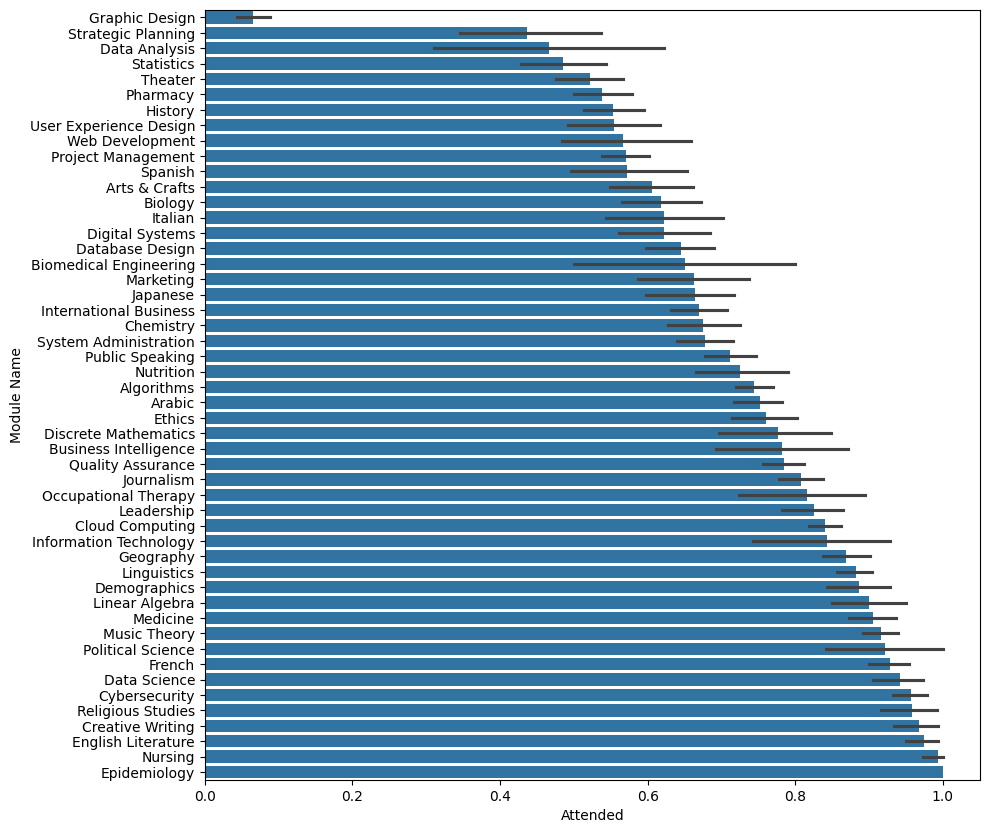

In [91]:
fig, ax = plt.subplots(figsize=(10, 10)) # Barchart plot using seaborn
sns.barplot(x = 'Attended', y = 'Module Name', data = df, ax=ax, order=order)
plt.show()

3. Write a short interpretation (2–3 sentences) explaining what the plot and error bars show.
The plot shows the mean attendance for each of the modules. Epidemiology has a mean attendance of 1 meaning that it had 100% attendance during the course of the module.
In constrast to this Graphic Design has a mean attendance of around 0.08, a low score. The error bars show the how certain we are about the mean. A longer bar suggests that
the attendance rate varied widely. Graphic Design has a short error bar, which suggests that most students had low attendance. Whereas Biomedical Engineering has a long error bar suggesting variation in attendance rates.

✅ **Checkpoint:** My notebook and/or my Shiny app show a barplot with error bars, one bar per module (x-axis), where the height of the bar is the module's attendance rate (y-axis).

---



### **Exercise 5 — Attendance Relationships**



1. Answer the question: **Do students with low overall attendance tend to attend modules that have low attendance?**.

2. **[For L5 students only]**. Choose between a correlation analysis or a linear regression analysis to answer the question.

3. **[For L6 students only]** Run both correlation analysis and linear regression analysis to answer the same question. Do they tell the same story?

> Tips:
> 1. Compute the mean attendance rate of each module. Can you re-use some of the `groupby` code you wrote above?
> 2. For each module, compute the average overall attendance of the students who attended that module.
> 3. Correlation and linear regression can both help you answer the question. 
> 4. Report main statistic and p-value(s).


In [92]:
# your code here
module_attendance_mean = df.groupby('Module Name')['Attended'].mean() # Use groupby method to group by Module
                                                                      # then find the mean based on the attended column
module_attendance_mean_df = module_attendance_mean.to_frame().reset_index() # Creates a dataframe for merging
module_attendance_mean_df = module_attendance_mean_df.rename(columns={'Attended': 'Average Module Attendance'}) # Rename column for clarity
module_attendance_mean_df.head() 

,Module Name,Average Module Attendance
0,Algorithms,0.744737
1,Arabic,0.752266
2,Arts & Crafts,0.605263
3,Biology,0.618750
4,Biomedical Engineering,0.650000


In [93]:
average_overall_att_by_mod = df.groupby('Module Name')['Student Overall Attendance'].mean() # Find the average Student Overall Attendance per module
average_overall_att_by_mod = average_overall_att_by_mod.rename('Average Overall Student Attendance')
average_overall_att_by_mod.head()

Module Name
Algorithms                0.710615
Arabic                    0.647835
Arts & Crafts             0.705918
Biology                   0.636538
Biomedical Engineering    0.701747
Name: Average Overall Student Attendance, dtype: float64

In [94]:
attendance_relationships_df = pd.merge(module_attendance_mean_df, average_overall_att_by_mod, on='Module Name', how='left') # Merge series into main data frame. Uses Module Name as a key for 
                                                                              # merging and makes sure to preserve original dataframe columns
attendance_relationships_df.head()

,Module Name,Average Module Attendance,Average Overall Student Attendance
0,Algorithms,0.744737,0.710615
1,Arabic,0.752266,0.647835
2,Arts & Crafts,0.605263,0.705918
3,Biology,0.618750,0.636538
4,Biomedical Engineering,0.650000,0.701747


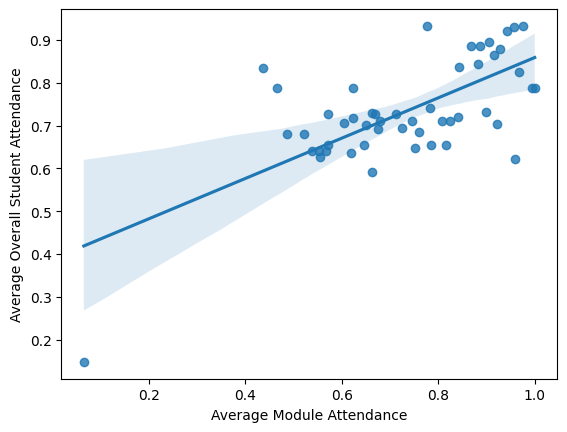

p value: 4.6863158878295244e-08 r value: 0.682846152238247


In [ ]:
correlation = stats.pearsonr(x=attendance_relationships_df['Average Module Attendance'], # Correlation analysis using scipy function
                             y=attendance_relationships_df['Average Overall Student Attendance']) 
r_value, p_value = correlation # Creates individual variables for printing
sns.regplot(x='Average Module Attendance', # Seaborn plot to visualise see the relationship
            y='Average Overall Student Attendance', data=attendance_relationships_df)
plt.show() # Shows visualisation
print('p value:', p_value, 'r value:', r_value) # Prints p and r values

The p value and r value above show that there is a significant positive correlation between a module's attendance rate and the average overall attendance rate.
This positive relationship indicates that modules with lower attendance tend to attract students who also have lower overall attendance records. I'll now complete
a linear regression analysis to see how much this relationship tells the story about what kind of student takes the module. 

In [ ]:
attendance_relationships_df = attendance_relationships_df.rename(columns={'Module Name': 'Module_Name', # Renaming the columns without spaces for linear regression function to work
                                                                          'Average Module Attendance': 'Average_Module_Attendance', 
                                                                          'Average Overall Student Attendance': 'Average_Overall_Student_Attendance'})  
model = smf.ols(formula='Average_Module_Attendance ~ Average_Overall_Student_Attendance', data=attendance_relationships_df).fit() # Linear regression function

# model summary
print(model.summary())

                                OLS Regression Results                               
Dep. Variable:     Average_Module_Attendance   R-squared:                       0.466
Model:                                   OLS   Adj. R-squared:                  0.455
Method:                        Least Squares   F-statistic:                     41.93
Date:                       Thu, 13 Nov 2025   Prob (F-statistic):           4.69e-08
Time:                               14:38:19   Log-Likelihood:                 29.889
No. Observations:                         50   AIC:                            -55.78
Df Residuals:                             48   BIC:                            -51.95
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

An R-squared value of 0.466 means that 46.6% of the differences we see in a module's attendance rate can be explained through a student's overall attendance rate. To answer the question "Do students with low overall attendance tend to attend modules that have low attendance?" I think that both the correlation and linear regression analysis point to this being the case.

✅ **Checkpoint:** Table or printout showing correlation or regression results.

# THE END!